In [6]:
import pandas as pd
import numpy as np

In [7]:
from id3 import export_graphviz
from os import system
from sklearn import tree

In [8]:
from sklearn import preprocessing

In [9]:
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Reading the dataset

In [10]:
df = pd.read_csv(r'C:\Users\seema\Documents\Jupyter\AIML L2A\Data Sets\Titanic\Titanic_Train.csv')

In [11]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Missing Value Treatment

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

## Calculating the skewness to find appropriate value to fill null for 'Age' 

In [14]:
df['Age'].skew()   #not heavily skewed, can go for mean 

0.38910778230082704

In [15]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
df['Age'].fillna(df['Age'].mean(),inplace = True)   #Also, mean and median are almost same here 

In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
C22 C26        3
              ..
D10 D12        1
C106           1
B50            1
B41            1
D49            1
Name: Cabin, Length: 147, dtype: int64

## Dropping the columns not contributing

In [19]:
df.drop(['PassengerId','Ticket','Cabin','Embarked','Name','Fare'],axis=1,inplace = True) #dropping these features as they don't contribute in the decision to be made

In [20]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0


## Encoding 'Sex' with 1 and 0

In [21]:
label_encoder = preprocessing.LabelEncoder()

In [22]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [23]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

## Preparing the arrays of input and output variables

In [24]:
inputx = np.array(df.drop('Survived',axis=1))

In [25]:
inputx

array([[ 3.        ,  1.        , 22.        ,  1.        ,  0.        ],
       [ 1.        ,  0.        , 38.        ,  1.        ,  0.        ],
       [ 3.        ,  0.        , 26.        ,  0.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765,  1.        ,  2.        ],
       [ 1.        ,  1.        , 26.        ,  0.        ,  0.        ],
       [ 3.        ,  1.        , 32.        ,  0.        ,  0.        ]])

In [26]:
inputy = np.array(df['Survived'])

In [27]:
inputy

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [28]:
feature_names = ['Pclass','Sex','Age','SibSp','Parch']

## Training the data prepared with the decision tree model

##### ID3  (Information Gain)

In [29]:
#implementing ID3 and CART since C4.5 is similar to CART

decision_tree_Igain = tree.DecisionTreeClassifier(criterion="entropy",random_state = 1)
decision_tree_Igain_ = decision_tree_Igain.fit(inputx, inputy)
print("Decision Tree Using Information Gain Score:", decision_tree_Igain_.score(inputx, inputy)) 

Decision Tree Using Information Gain Score: 0.920314253647587


In [30]:
tree.export_graphviz(decision_tree_Igain_, feature_names = feature_names, out_file="Titanic_tree_Igain.dot")

In [31]:
system("dot -Tpng Titanic_tree_Igain.dot -o Titanic_Decision_Tree_IGain.png")

0

##### CART  (Gini Index)

In [32]:
decision_tree_gini = tree.DecisionTreeClassifier(criterion="gini",random_state = 1)
decision_tree_gini_ = decision_tree_gini.fit(inputx, inputy)
print("Decision Tree Using Gini Score:", decision_tree_gini_.score(inputx, inputy))

Decision Tree Using Gini Score: 0.920314253647587


In [33]:
tree.export_graphviz(decision_tree_gini_, feature_names = feature_names, out_file="Titanic_tree_gini.dot")

In [34]:
system("dot -Tpng Titanic_tree_gini.dot -o Titanic_Decision_Tree_gini.png")

0

## Preparing the test data

In [35]:
test=pd.read_csv(r"C:\Users\seema\Documents\Jupyter\AIML L2A\Data Sets\Titanic\Titanic_Test.csv")

In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
test['Age'].skew()

0.4573612871503845

In [39]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [40]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [41]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
test['Sex'] = label_encoder.fit_transform(test['Sex'])

In [43]:
test_features = test[["Pclass", "Sex","Age", "SibSp", "Parch"]].values

## Making prediction on test set

##### ID3 (Information Gain)

In [44]:
prediction_Igain = decision_tree_Igain.predict(test_features)

##### CART (Gini Index)

In [45]:
prediction_gini = decision_tree_gini.predict(test_features)

## Creating DataFrame

In [46]:
PassengerId = np.array(test["PassengerId"]).astype(int)

## Final result on the test data

##### ID3 (Information Gain)

In [47]:
solution_Igain = pd.DataFrame(prediction_Igain, PassengerId, columns = ["Survived"])

solution_Igain.to_csv("Titanic_Igain_Result.csv", index_label = ["PassengerId"])

##### CART (Gini Index)

In [48]:
solution_gini = pd.DataFrame(prediction_gini, PassengerId, columns = ["Survived"])

solution_gini.to_csv("Titanic_Gini_Result.csv", index_label = ["PassengerId"])

## Plotting the results using cross-validation

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ID3:[ Accuracy = 80.026217 ; Standard Deviation = (0.021365)]
Gini:[ Accuracy = 79.911361 ; Standard Deviation = (0.020862)]


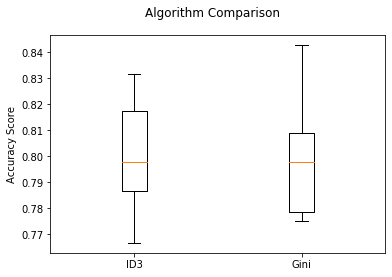

In [49]:
models = [decision_tree_Igain,decision_tree_gini]
results = []
names = ['ID3','Gini']
scoring = 'accuracy'
for model,name in zip(models,names):
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, inputx, inputy, cv=kfold, scoring=scoring)
    results.append(cv_results)
    
    msg = "%s:[ %s %f %s (%f)]" % (name,'Accuracy =', cv_results.mean()*100, '; Standard Deviation =', cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy Score')
pyplot.show()